# About
This notebook houses code from my Medium article titled "How Neural Networks Sovle the XOR Problem",

### Importing Python libraries
Apart from the usual visualization (`matplotlib` and `seaborn`) and numerical computation libraries (`numpy`), we’ll use `cycle` from `itertools` . This is done since our algorithm cycles through our data indefinitely until it manages to correctly classify the entire training data without any mistakes in the middle.

In [3]:
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Configuring plotting params

In [4]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams["figure.figsize"] = [20, 10]

### Our Training Data
We next create our training data. This data is the same for each kind of logic gate, since they all take in two boolean variables as input.

In [5]:
train_data = np.array(
    [
        [0, 0],  #0  #0
        [0, 1],  #0  #1
        [1, 0],  #0 #0
        [1, 1]])  #1 #0

target_xor = np.array(
    [
        [0],
        [1],
        [1],
        [0]])

target_nand = np.array(
    [
        [1],
        [1],
        [1],
        [0]])

target_or = np.array(
    [
        [0],
        [1],
        [1],
        [1]])

target_and = np.array(
    [
        [0],
        [0],
        [0],
        [1]])

In [25]:
#x = 5.6

## The Perceptron Class
To bring everything together, we create a simple Perceptron class with functions like `train`, `forward`, `classify`, etc. We have some instance variables like the training data, the target, the number of input nodes and the learning rate.

The class below has docstrings to explain what each function does.

In [6]:
class Perceptron:
    """
    Create a perceptron.

    train_data: A 4x2 matrix with the input data.

    target: A 4x1 matrix with the perceptron's expected outputs

    lr: the learning rate. Defaults to 0.01

    input_nodes: the number of nodes in the input layer of the perceptron.
        Should be equal to the second dimension of train_data.
    """

    def __init__(self, train_data, target, lr=0.01, input_nodes=2):
        self.train_data = train_data
        self.target = target
        self.lr = lr
        self.input_nodes = input_nodes

        # randomly initialize the weights and set the bias to -1.
        self.w = np.random.uniform(size=self.input_nodes)
        self.b = -1

        # node_val hold the values of each node at a given point of time.
        self.node_val = np.zeros(self.input_nodes)

        # tracks how the number of consecutively correct classifications
        # changes in each iteration
        self.correct_iter = [0]

    def _gradient(self, node, exp, output):
        """
        Return the gradient for a weight.
        This is the value of delta-w.
        """
        return node * (exp - output)

    def update_weights(self, exp, output):
        """
        Update weights and bias based on their respective gradients
        """
        for i in range(self.input_nodes):
            self.w[i] += self.lr * self._gradient(self.node_val[i], exp, output)

        # the value of the bias node can be considered as being 1 and the weight between this node
        # and the output node being self.b
        self.b += self.lr * self._gradient(1, exp, output)

    def forward(self, datapoint):
        """
        One forward pass through the perceptron.
        Implementation of "wX + b".
        """
        return self.b + np.dot(self.w, datapoint)

    def classify(self, datapoint):
        """
        Return the class to which a datapoint belongs based on
        the perceptron's output for that point.
        """
        if self.forward(datapoint) >= 0:
            return 1

        return 0
###############################################################
    def plot(self, h=0.01):
        """
        Generate plot of input data and decision boundary.
        """
        # setting plot properties like size, theme and axis limits
        sns.set_style('darkgrid')
        plt.figure(figsize=(10, 10))

        plt.axis('scaled')
        plt.xlim(-0.1, 1.1)
        plt.ylim(-0.1, 1.1)

        colors = {
            0: "ro",
            1: "go"
        }

        for i in range(len(self.train_data)):
            plt.plot([self.train_data[i][0]],
                     [self.train_data[i][1]],
                     colors[self.target[i][0]],
                     markersize=20)

        x_range = np.arange(-0.1, 1.1, h)
        y_range = np.arange(-0.1, 1.1, h)

        # creating a mesh to plot decision boundary
        xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
        Z = np.array([[self.classify([x, y]) for x in x_range] for y in y_range])

        # using the contourf function to create the plot
        plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)

####################################################
    def train(self):
        """
        Train a single layer perceptron.
        """
        # the number of consecutive correct classifications
        correct_counter = 0  
        iterations = 0 

        for train, target in cycle(zip(self.train_data, self.target)):
            # end if all points are correctly classified
            if correct_counter == len(self.train_data):  #length
                break

            # a single layer perceptron can't model the xor function
            # so it'll never converge!
            if iterations > 1000:
                print("1000 iterations exceded without convergence! A single layered perceptron can't handle the XOR problem.")
                break

            output = self.classify(train)
            self.node_val = train
            iterations += 1

            # if correctly classified, increment correct_counter
            if output == target:
                correct_counter += 1
            else:
                # if incorrectly classified, update weights and reset correct_counter
                self.update_weights(target, output)
                correct_counter = 0
        
            self.correct_iter.append(correct_counter)
        

### Analyzing the Results (XOR)

A single-layered perceptron isn't enough to model the 2d XOR function, so training will never converge. Here, convergence means correctly classifying all training examples consecutively.

In [7]:
p_xor = Perceptron(train_data, target_xor)
p_xor.train()

1000 iterations exceded without convergence! A single layered perceptron can't handle the XOR problem.


Remember that a perceptron must correctly classify the entire training data in one go. If we keep track of how many points it correctly classified consecutively, we get something like this.

In [8]:
#_ = plt.plot(p_xor.correct_iter[:100])

The algorithm only terminates when correct_counter hits 4 — which is the size of the training set — so this will go on indefinitely.

### Analyzing the Results (OR)
We’ll use the same Perceptron class as before, only that we’ll train it on OR training data.

In [9]:
p_or = Perceptron(train_data, target_or)
p_or.train()

This converges, since the data for the OR function is linearly separable. If we plot the number of correctly classified consecutive datapoints as we did in our first attempt, we get the below plot. It’s clear that around iteration 125, it hits the value 4, meaning that it classified the entire dataset correctly.


In [10]:
#_ = plt.plot(p_or.correct_iter[:200])

The decision boundary plot looks like this:


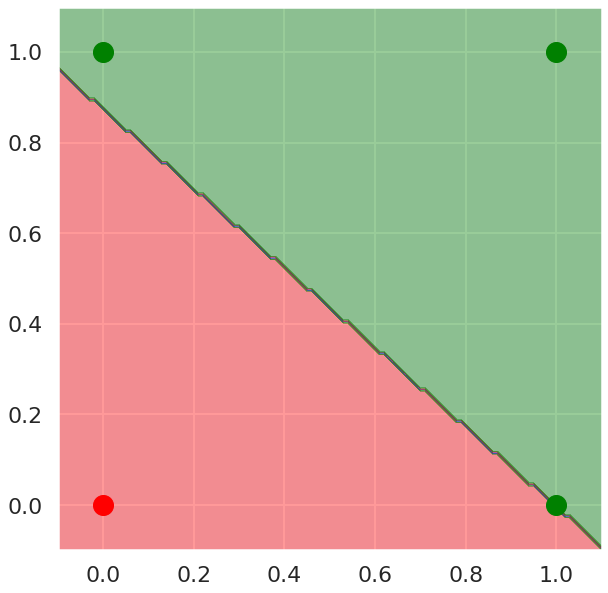

In [11]:
p_or.plot()

### Analyzing the Results (NAND)
Let’s move on to the second part. We need to model a NAND gate. Just like the OR part, we’ll use the same code, but train the model on the NAND data.

In [12]:
p_nand = Perceptron(train_data, target_nand)
p_nand.train()

After training, the following plots show that our model converged on the NAND data and mimics the NAND gate perfectly.


In [13]:
#_ = plt.plot(p_nand.correct_iter[:1000])

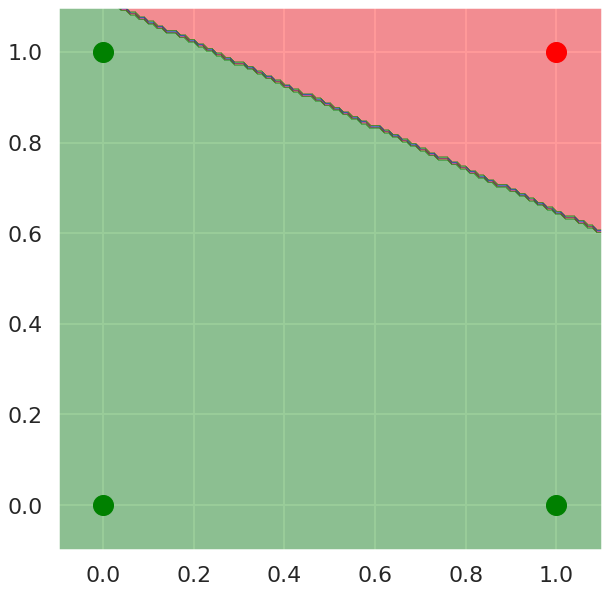

In [14]:
_ = p_nand.plot()

The plot above shows perfect convergence.

## Modeling the XOR function by combining single-layered perceptrons

### Modeling the AND function

To do this, we'll need an AND gate as well. So let's quickly train it using the same approach that we used for the other gates.

In [15]:
p_and = Perceptron(train_data, target_and)
p_and.train()

In [16]:
#_ = plt.plot(p_and.correct_iter[:100])

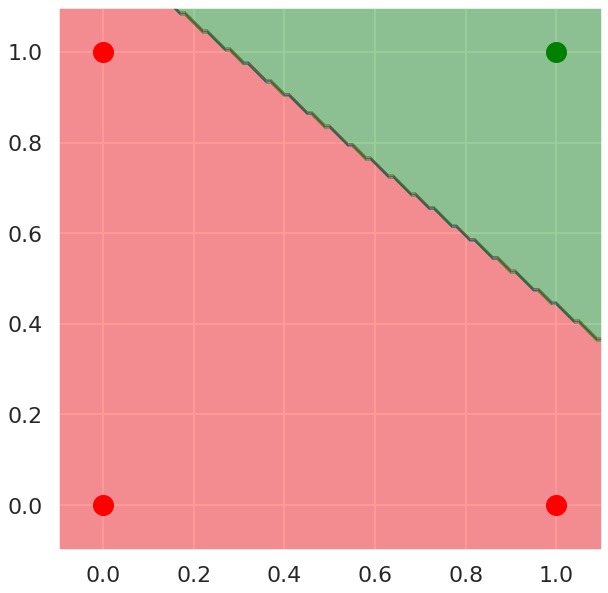

In [17]:
p_and.plot()

### The XOR function

The XOR function is basically a combination of an and, nand and or gate.

In the article, we derived this result:
```
XOR(x1, x2) = AND(
    OR(x1, x2),
    NAND(x1, x2)
)
```

In [18]:
def XOR(x1, x2):
    """
    Return the boolean XOR of x1 and x2 by combining
    individual single-layered perceptrons
    """

    x = [x1, x2]
    p_or = Perceptron(train_data, target_or)
    p_nand = Perceptron(train_data, target_nand)
    p_and = Perceptron(train_data, target_and)

    p_or.train()
    p_nand.train()
    p_and.train()

    return p_and.classify([p_or.classify(x),
                          p_nand.classify(x)])


When we try and find the XOR of 1 and 1, we get 0 just like we expected.

In [19]:
XOR(1, 0)


1

## MLP
A multi-layered perceptron can have hidden layers.

There are no fixed rules on the number of hidden layers or the number of nodes in each layer of a network. The best performing models are obtained through trial and error.

Let’s go with a single hidden layer with two nodes in it. We’ll be using the sigmoid function in each of our hidden layer nodes and of course, our output node.

### The MLP Class

This class houses each component of our MLP, from training and the forward pass, to classifying and plotting the decision boundary. Check the docstrings below to get an idea of what each function or variable is for.

In [20]:
class MLP:
    """
    Create a multi-layer perceptron.

    train_data: A 4x2 matrix with the input data.

    target: A 4x1 matrix with expected outputs

    lr: the learning rate. Defaults to 0.1

    num_epochs: the number of times the training data goes through the model
        while training

    num_input: the number of nodes in the input layer of the MLP.
        Should be equal to the second dimension of train_data.
    
    num_hidden: the number of nodes in the hidden layer of the MLP.

    num_output: the number of nodes in the output layer of the MLP.
        Should be equal to the second dimension of target.
    """
    def __init__(self, train_data, target, lr=0.1, num_epochs=100, num_input=2, num_hidden=2, num_output=1):
        self.train_data = train_data
        self.target = target
        self.lr = lr
        self.num_epochs = num_epochs

        # initialize both sets of weights and biases randomly
            # - weights_01: weights between input and hidden layer
            # - weights_12: weights between hidden and output layer
        self.weights_01 = np.random.uniform(size=(num_input, num_hidden))
        self.weights_12 = np.random.uniform(size=(num_hidden, num_output))

        # - b01: biases for the  hidden layer
        # - b12: bias for the output layer
        self.b01 = np.random.uniform(size=(1,num_hidden))
        self.b12 = np.random.uniform(size=(1,num_output))

        self.losses = []

    def update_weights(self):
        
        # Calculate the squared error
        loss = 0.5 * (self.target - self.output_final) ** 2
        self.losses.append(np.sum(loss))

        error_term = (self.target - self.output_final)

        # the gradient for the hidden layer weights
        grad01 = self.train_data.T @ (((error_term * self._delsigmoid(self.output_final)) * self.weights_12.T) * self._delsigmoid(self.hidden_out))

        # the gradient for the output layer weights
        grad12 = self.hidden_out.T @ (error_term * self._delsigmoid(self.output_final))

        # updating the weights by the learning rate times their gradient
        self.weights_01 += self.lr * grad01
        self.weights_12 += self.lr * grad12

        # update the biases the same way
        self.b01 += np.sum(self.lr * ((error_term * self._delsigmoid(self.output_final)) * self.weights_12.T) * self._delsigmoid(self.hidden_out), axis=0)
        self.b12 += np.sum(self.lr * error_term * self._delsigmoid(self.output_final), axis=0)

    def _sigmoid(self, x):
        """
        The sigmoid activation function.
        """
        return 1 / (1 + np.exp(-x))    

    def _delsigmoid(self, x):
        """
        The first derivative of the sigmoid function wrt x
        """
        return x * (1 - x)

    def forward(self, batch):
        """
        A single forward pass through the network.
        Implementation of wX + b
        """

        self.hidden_ = np.dot(batch, self.weights_01) + self.b01
        self.hidden_out = self._sigmoid(self.hidden_)

        self.output_ = np.dot(self.hidden_out, self.weights_12) + self.b12
        self.output_final = self._sigmoid(self.output_)

        return self.output_final

    def classify(self, datapoint):
        """
        Return the class to which a datapoint belongs based on
        the perceptron's output for that point.
        """
        datapoint = np.transpose(datapoint)
        if self.forward(datapoint) >= 0.5:
            return 1

        return 0
#################################################################################
    def plot(self, h=0.01):
        """
        Generate plot of input data and decision boundary.
        """
        # setting plot properties like size, theme and axis limits
        sns.set_style('darkgrid')
        plt.figure(figsize=(10, 10))

        plt.axis('scaled')
        plt.xlim(-0.1, 1.1)
        plt.ylim(-0.1, 1.1)

        colors = {
            0: "ro",
            1: "go"
        }

        # plotting the four datapoints
        for i in range(len(self.train_data)):
            plt.plot([self.train_data[i][0]],
                     [self.train_data[i][1]],
                     colors[self.target[i][0]],
                     markersize=20)

        x_range = np.arange(-0.1, 1.1, h)
        y_range = np.arange(-0.1, 1.1, h)

        # creating a mesh to plot decision boundary
        xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
        Z = np.array([[self.classify([x, y]) for x in x_range] for y in y_range])

        # using the contourf function to create the plot
        plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)
###########################################################################################
    def train(self):
        """
        Train an MLP. Runs through the data num_epochs number of times.
        A forward pass is done first, followed by a backward pass (backpropagation)
        where the networks parameter's are updated.
        """
        for epoch in range(self.num_epochs):

            self.forward(self.train_data)
            self.update_weights()
            
            if epoch % 500 == 0:
                print("Loss: ", self.losses[epoch]) 

### Analyzing the Results
Let’s train our MLP with a learning rate of 0.2 over 8000 epochs.

In [26]:
mlp = MLP(train_data, target_xor, 0.02, 10000)
mlp.train()

Loss:  0.7769481653217956
Loss:  0.49980559229169574
Loss:  0.4996225037092027
Loss:  0.4994957073493026
Loss:  0.4993600413741842
Loss:  0.4992121617225197
Loss:  0.4990481667655528
Loss:  0.4988633917616783
Loss:  0.4986521554079144
Loss:  0.49840744127108877
Loss:  0.498120495897465
Loss:  0.497780323033768
Loss:  0.49737305202553433
Loss:  0.4968811591163713
Loss:  0.4962825242513317
Loss:  0.49554931408393565
Loss:  0.4946466944093888
Loss:  0.4935313913467615
Loss:  0.49215013991561474
Loss:  0.4904380874895739


If we plot the values of our loss function, we get the following plot after about 8000 iterations, showing that our model has indeed converged.

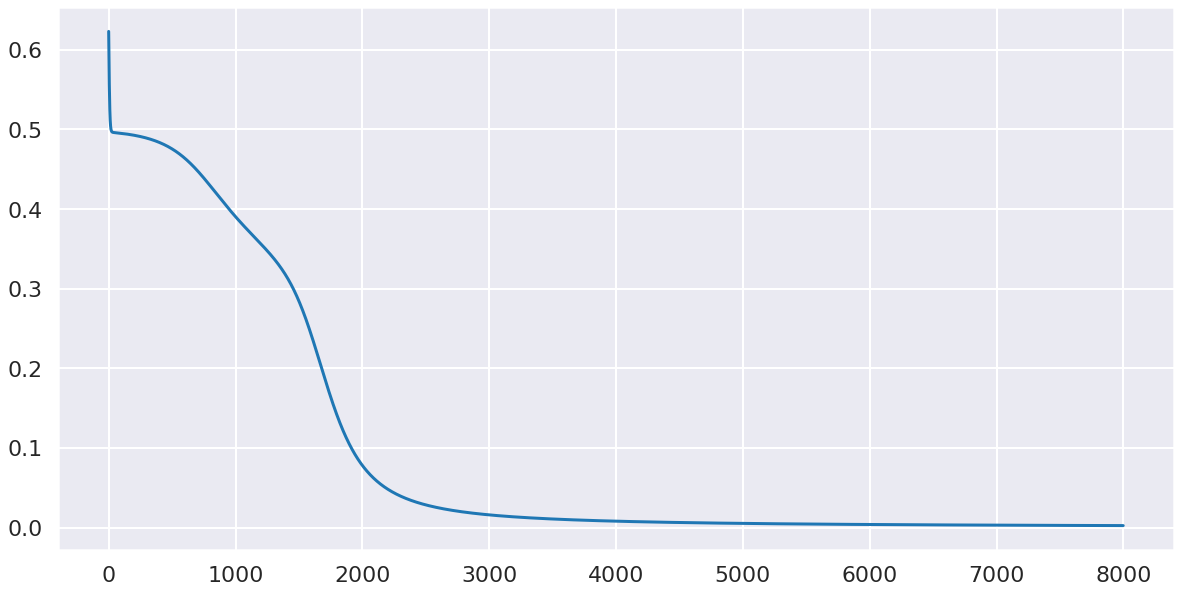

In [22]:
_ = plt.plot(mlp.losses)

A clear non-linear decision boundary is created here with our generalized neural network, or MLP.

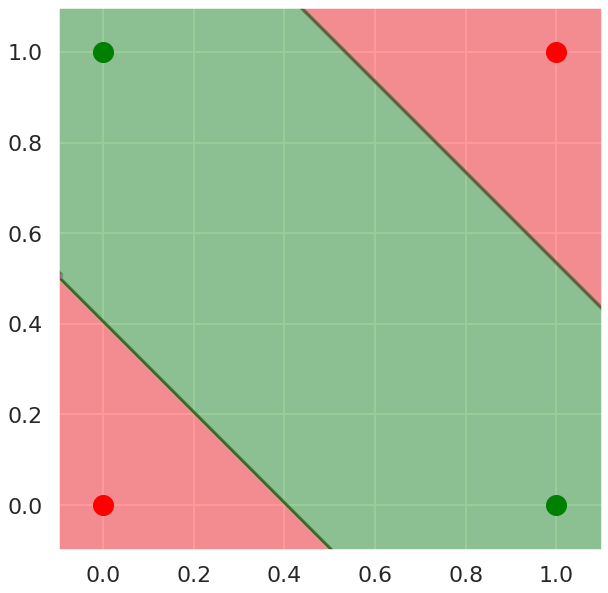

In [23]:
mlp.plot()